In [1]:
import os
import sys
import pandas as pd

In [2]:
sample_sub = pd.read_csv("../data/text_class/sample_submission.csv")
test_csv = pd.read_csv("../data/text_class/test.csv")
train_csv = pd.read_csv("../data/text_class/train.csv")

In [3]:
train_csv.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


well not much to see here.. I guess we can see if there are any empty values

In [ ]:
sum(train_csv['comment_text'].isna()) #huh there is no empty value.. that cant be true. lets use the tokeniser afterall

0

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [4]:
# Get the number of tokens in each sentence in train_csv['comment_text']
train_csv['num_tokens'] = train_csv['comment_text'].apply(lambda x: len(x.split()))


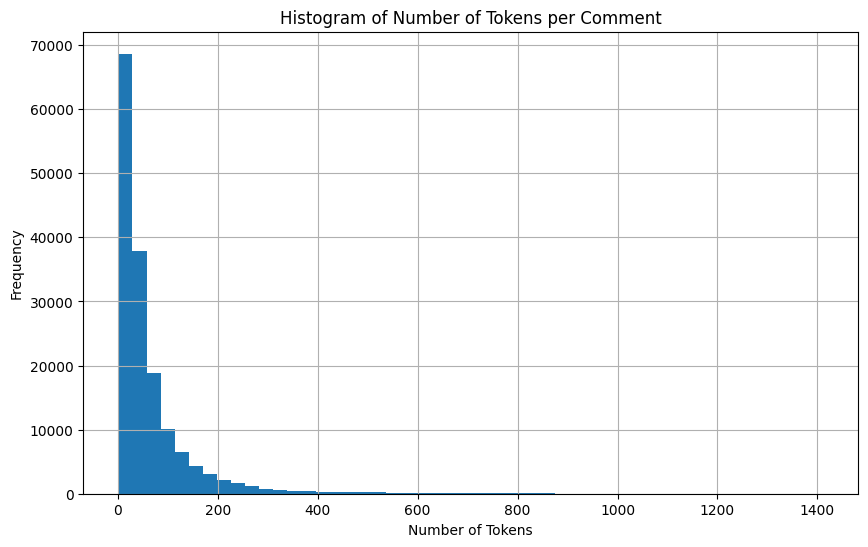

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
train_csv['num_tokens'].hist(bins=50)
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Tokens per Comment')
plt.show()

In [25]:
# Find unique one-word sentences in train_csv['comment_text']
one_word_sentences = train_csv[train_csv['num_tokens'] == 1]['comment_text'].unique()
print(one_word_sentences)

['(www.ebenefits.va.gov)' '14:53,' 'User_talk:Blackson#Religious_bias'
 '92.24.199.233|92.24.199.233]]' 'Complaints/Mistakes'
 'http://en.wikipedia.org/wiki/Wikipedia_talk:No_original_research/archive15#YouTube_art_as_primary_source'
 'http://finance.yahoo.com/news/7-fascinating-nuggets-another-bewildering-150348488.html'
 '{{unblock|yo' 'Talk:E%3DMC%C2%B2_(Mariah_Carey_album)#Concerns_Part_2'
 'http://en.wikipedia.org/wiki/Wikipedia:ELYES' '{{unbloc'
 'Wikipedia:Administrators%27_noticeboard/Incidents#TharkunColl_and_Lord_Loxley'
 '|needs-infobox=yes' '(talk)/(contribs)' 'User:Wipeouting'
 'hyper_individualist@yahoo.com'
 'http://www.haaretz.com/news/diplomacy-defense/2-279-calories-per-person-how-israel-made-sure-gaza-didn-t-starve.premium-1.470419']


In [21]:
# Get the vocabulary from all comment_text in train_csv
sentences = train_csv['comment_text'].astype(str).tolist()
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
vocab = tokenizer.word_index  # dictionary: word -> index
print(f"Vocabulary size: {len(vocab)}")
# To see the first 10 words:
print(list(vocab.items())[:10])

Vocabulary size: 210337
[('the', 1), ('to', 2), ('of', 3), ('and', 4), ('a', 5), ('you', 6), ('i', 7), ('is', 8), ('that', 9), ('in', 10)]


In [ ]:
# convert the sentences (strings) into integers
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
# print("sequences:", sequences); exit()